**this is a template notebook for Assignment 4 on Recommendation. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>\<Title of your notebook>
Author: <span style='background:yellow'>\<your name\></span><br>
Student number: <span style='background:yellow'>\<your student number\></span><br>
Date: <span style='background:yellow'>\<current date\></span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    #pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')

Pandas already installed, only imported


# 1. The Item-Based Recommender

We are going to build an item-based recommender for **<span style='background:yellow'>\<YOUR INPUT></span>**. In this recommender we could for example **<span style='background:yellow'>\<give a brief description of an example how your recommender would work></span>**.


Data source:https://www.kaggle.com/code/philippsp/book-recommender-collaborative-filtering-shiny/data?select=books.csv
 
To begin we'll need to load some data.

In [2]:
# enter code to load your example data file(s)
rating_df = pd.read_csv('datav2/ratings.csv', sep=',', names = ['bookId', 'userId', 'rating'])
rating_df.dropna()
rating_df.head()


C:\Users\Stephen Pangga\AppData\Local\Temp\ipykernel_20828\4265952691.py:2: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rating_df = pd.read_csv('datav2/ratings.csv', sep=',', names = ['bookId', 'userId', 'rating'])


,bookId,userId,rating
0,book_id,user_id,rating
1,1,314,5
2,1,439,3
3,1,588,5
4,1,1169,4


**<span style='background:yellow'>\<explain a bit about the data file(s), if you have multiple and need to merge them, use the code cell below></span>**

In [3]:
# Optional depending on your dataset,
book_dataset= pd.read_csv('datav2/books.csv', sep=',', low_memory=False)
book_dataset.dropna()
book_dataset.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
# enter code to select appropriate columns
book_df = pd.DataFrame()
book_df['bookId'] = book_dataset['book_id']
book_df['bookName'] = book_dataset['original_title']
book_df.dropna()
book_df.head()


,bookId,bookName
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
2,41865,Twilight
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


In [5]:
#merge the rating and movie table
merge_df = pd.merge(rating_df, book_df, on='bookId')
merge_df.dropna()
merge_df.head()

,bookId,userId,rating,bookName
0,2657,324,4,To Kill a Mockingbird
1,2657,1600,2,To Kill a Mockingbird
2,2657,1800,4,To Kill a Mockingbird
3,2657,2077,1,To Kill a Mockingbird
4,2657,2779,3,To Kill a Mockingbird


In [6]:
merge_df.count()

bookId      59903
userId      59903
rating      59903
bookName    58822
dtype: int64

We need one row per user, and his/her scores for each **<span style='background:yellow'>\<YOUR OBJECT></span>**. We can do this by creating a pivot table.

In [7]:
# code to create pivot table
rating_matrix = merge_df.pivot_table(index='userId', columns='bookName', values='rating')
rating_matrix.head()

bookName,,Animal Farm & 1984,Carter Beats the Devil,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,31 Songs,A Bend in the River,A Bend in the Road,...,Бесы,Братья Карамазовы,Преступление и наказание,Рассказы и Повести,Ἀντιγόνη,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu]
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also need to take the counts into consideration so lets keep those into their own dataframe, together with the average score:

In [8]:
# code to make a dataframe with the unique objects, their average score and the number of scores
ratingCount  = pd.DataFrame(merge_df.groupby('bookName')['rating'].mean())

ratingCount['nRating'] = merge_df.groupby('bookName')['rating'].count()

ratingCount.sort_values(by=['nRating']).head()


,rating,nRating
bookName,,
Shadow of the Hegemon,4.000000,57
"Jesus Freaks: DC Talk and The Voice of the Martyrs - Stories of Those Who Stood for Jesus, the Ultimate Jesus Freaks",4.186441,59
Shopaholic Abroad,3.796610,59
Ghostwritten,3.166667,60
Loving What Is: Four Questions That Can Change Your Life,3.250000,60


To decide on a cut-off point as minimum number of scores to be eligable we can plot the number of scores in a histogram:

<AxesSubplot:>

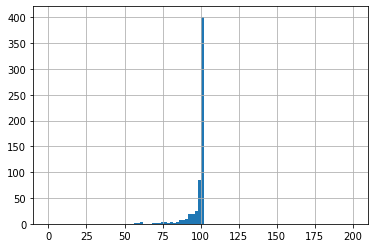

In [9]:
# code to generate the histogram
ratingCount['nRating'].hist(bins=100, range=(0,200))

<AxesSubplot:>

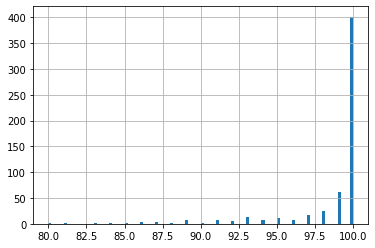

In [10]:
ratingCount['nRating'].hist(bins=100, range=(80,100))

From the histogram we can see that **<span style='background:yellow'>\<Explain in your own words what you notice and what you decide on as the cut-off point, explain why></span>**

Finally we can create the code to perform a recommendation. First we can select one particular **<span style='background:yellow'>\<YOUR OBJECT></span>**

In [11]:
# code to select one field
book_df[book_df['bookName'] == "To Kill a Mockingbird"]

,bookId,bookName
3,2657,To Kill a Mockingbird


And then to find the recommendation based on the correlations.

In [12]:
# code to create the recommendation
mybook = rating_matrix["To Kill a Mockingbird"]

myCorrelation = rating_matrix.corrwith(mybook).sort_values(ascending=False)

correlation_df = pd.DataFrame(myCorrelation,columns=['Correlation'])
correlation_df.dropna(inplace=True)
correlation_df.sort_values('Correlation', ascending=False)
correlation_df.head()

c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
bookName,
The Client,1.0
Jackdaws,1.0
A Spot of Bother,1.0
The Beautiful and Damned,1.0
To Kill a Mockingbird,1.0


**<span style='background:yellow'>\<interpret the result></span>**

It might be nice to have one simple function that could do all the work for us. It should have as input parameter a field and then returns the recommendation:

In [13]:
correlation_df = correlation_df.merge(ratingCount['nRating'], on='bookName')
correlation_df.head()

,Correlation,nRating
bookName,,
The Client,1.0,100
Jackdaws,1.0,100
A Spot of Bother,1.0,100
The Beautiful and Damned,1.0,100
To Kill a Mockingbird,1.0,100


In [14]:
correlation_df[correlation_df['nRating']>=50]

,Correlation,nRating
bookName,,
The Client,1.000000,100
Jackdaws,1.000000,100
A Spot of Bother,1.000000,100
The Beautiful and Damned,1.000000,100
To Kill a Mockingbird,1.000000,100
'Tis: A Memoir,1.000000,100
Howards End,1.000000,100
The Informers,1.000000,94
Generation X: Tales for an Accelerated Culture,1.000000,100


In [15]:
# code for a python function
def book_recommendation(bookName):
    #source: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html
    #filter the dataset.
    new_rating_df = rating_df.groupby('bookId').filter(lambda x: x['rating'].count()>=100)
    
    #make a new merge with book dataframe
    new_merge_df = pd.merge(new_rating_df, book_df, on='bookId')

    #make a pivot table
    new_rating_matrix = new_merge_df.pivot_table(index='userId', columns='bookName', values='rating')

    #Correlations
    the_book = new_rating_matrix[bookName]

    myCorrelation = new_rating_matrix.corrwith(the_book).sort_values(ascending=False)

    correlation_df = pd.DataFrame(myCorrelation,columns=['Correlation'])

    correlation_df.dropna(inplace=True)

    correlation_df.sort_values('Correlation', ascending=False)

    return correlation_df.head()


Lets test the function:

In [16]:
# code to test the function with another movie.
book_recommendation("Salt: A World History")

c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
bookName,
Carter Beats the Devil,1.0
Infinite Jest,1.0
"The Life and Strange Surprising Adventures of Robinson Crusoe of York, Mariner",1.0
The Giver,1.0
Boy: Tales of Childhood,1.0


<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However no template is available for these chapters. You will have to create it yourself.
    ----</center></font>

# 2. Negative correlations

The recommenders so far used, are looking at what if I give a high rating for this, what do you then recommend me. But how about if I give a low rating for something, what would you then recommend me?

# 3. Content Based

Add a chapter showing how a basic content based recommender might work. A starting point for this might be https://www.datacamp.com/community/tutorials/recommender-systems-python (at about 1/3 of the page it starts explaining this in the section called ‘Content based’.

# 4. User Based

Add a chapter showing how a basic user based recommender might work. A starting point for this might be https://realpython.com/build-recommendation-engine-collaborative-filtering/

# 5. Combination

Combine two or more recommendation techniques to get an even better recommendation